# MiniEM Performance Tests on Blake - Blob Problem 

## Performance resutl

In [1]:
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Import scripts
from json2status import json2status
from json2strong import json2strong
from json2timeline import json2timeline

# Extract file names
files = glob.glob('ctest-*')


### Performance test status 

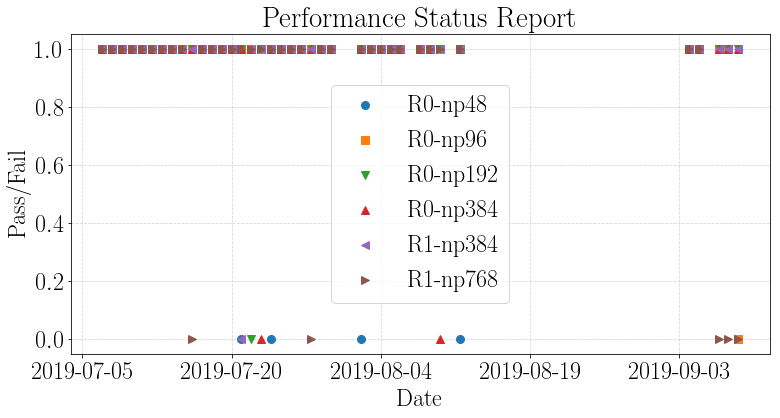

In [7]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Cases to plot:
cases = ('R0','R1')
nps = {'R0': (48, 96, 192, 384), 'R1': (384, 768)}

# Plot:
plt.figure()
imarker = 0
markers = ['o','s','v','^','<','>']
legNames = []
for case in cases:
    for np in nps[case]:
        # Extract info and plot
        dates, status = json2status(files, case, np)
        fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]
        plt.plot(fdates, status, markersize=8.0, marker=markers[imarker], linestyle='None')
        imarker = imarker + 1
        legNames.append(case+'-np'+str(np))
        
plt.xlabel('Date')
plt.ylabel('Pass/Fail')
#plt.ylim((6e-3, 1e-1))
plt.legend(legNames)
plt.tight_layout()
plt.title('Performance Status Report')
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
#ax.tick_params(axis='x',rotation = 45)
plt.show()

### Strong scaling results 

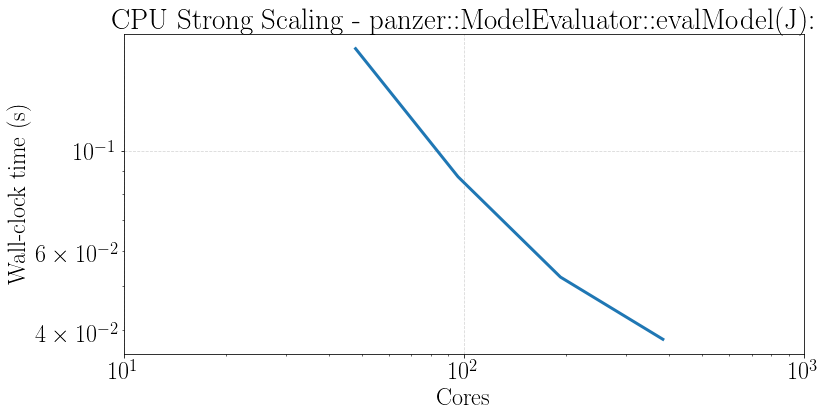

Cores:  (48, 96, 192, 384)
Wall-clock Time:  (0.168257, 0.0874845, 0.0524101, 0.0381471)


In [3]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Case to plot:
file = files[-1]
case = 'R0'
timer = 'panzer::ModelEvaluator::evalModel(J):'
nps, wtimes = json2strong(file, case, timer)

# Plot:
plt.figure()
plt.loglog(nps, wtimes, linewidth=3.0)
plt.xlabel('Cores')
plt.ylabel('Wall-clock time (s)')
plt.xlim((10,1000))
#plt.ylim((6e-3, 1e-1))
plt.tight_layout()
#plt.legend(pltLegend,loc='upper left',bbox_to_anchor=(1,1),prop={'size': 16})
#plt.subplots_adjust(right=0.60)
plt.title('CPU Strong Scaling - ' + timer)
ax = plt.gca()
ax.set_axisbelow(True)
ax.grid(linestyle='--', alpha=0.5)
plt.show()

# Print
print("Cores: ", nps)
print("Wall-clock Time: ", wtimes)

### Timeline results 

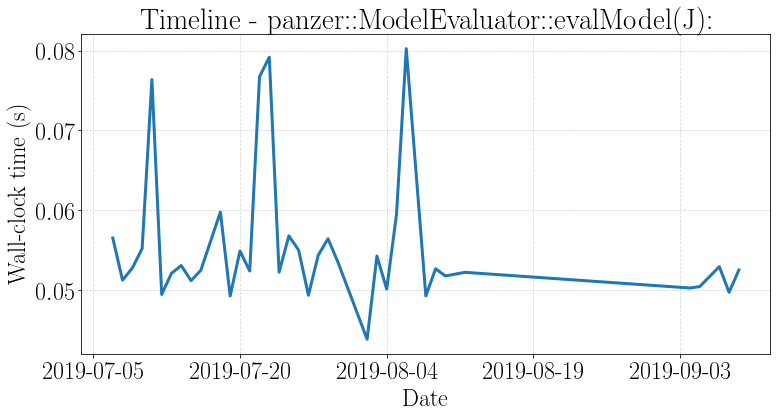

Dates:  (20190707, 20190708, 20190709, 20190710, 20190711, 20190712, 20190713, 20190714, 20190715, 20190716, 20190718, 20190719, 20190720, 20190721, 20190722, 20190723, 20190724, 20190725, 20190726, 20190727, 20190728, 20190729, 20190730, 20190802, 20190803, 20190804, 20190805, 20190806, 20190808, 20190809, 20190810, 20190812, 20190904, 20190905, 20190907, 20190908, 20190909)
Wall-clock Time:  (0.0565447, 0.0512645, 0.0527931, 0.0552138, 0.0763688, 0.0494854, 0.0521257, 0.0530983, 0.0512109, 0.052503, 0.0597806, 0.0492962, 0.0549228, 0.0524101, 0.0767238, 0.0791621, 0.0522754, 0.0568074, 0.0550267, 0.0493814, 0.0543906, 0.0564537, 0.053571, 0.0438757, 0.0542964, 0.0501506, 0.0594632, 0.080231, 0.0492923, 0.0526984, 0.0517989, 0.0522513, 0.0502901, 0.0504667, 0.0529656, 0.0497476, 0.052541)


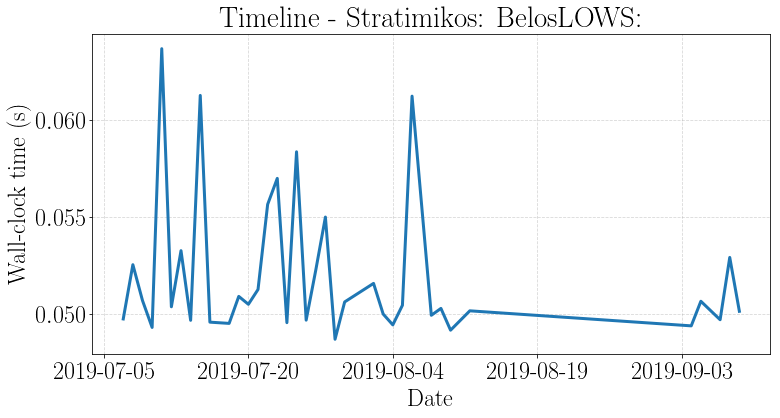

Dates:  (20190707, 20190708, 20190709, 20190710, 20190711, 20190712, 20190713, 20190714, 20190715, 20190716, 20190718, 20190719, 20190720, 20190721, 20190722, 20190723, 20190724, 20190725, 20190726, 20190727, 20190728, 20190729, 20190730, 20190802, 20190803, 20190804, 20190805, 20190806, 20190808, 20190809, 20190810, 20190812, 20190904, 20190905, 20190907, 20190908, 20190909)
Wall-clock Time:  (0.049760900000000004, 0.0525494, 0.050707999999999996, 0.0493247, 0.0636489, 0.05038550000000001, 0.05327030000000001, 0.0496904, 0.061247499999999996, 0.0495965, 0.049532900000000005, 0.0509199, 0.0505146, 0.051276, 0.05564789999999999, 0.0569841, 0.049569999999999996, 0.058350500000000007, 0.0496992, 0.0522724, 0.0549969, 0.0487171, 0.05063569999999999, 0.051588, 0.05001370000000001, 0.0494564, 0.0504641, 0.0612099, 0.049948599999999996, 0.0503028, 0.0491836, 0.0501788, 0.0494064, 0.0506702, 0.0497207, 0.052923, 0.0501543)


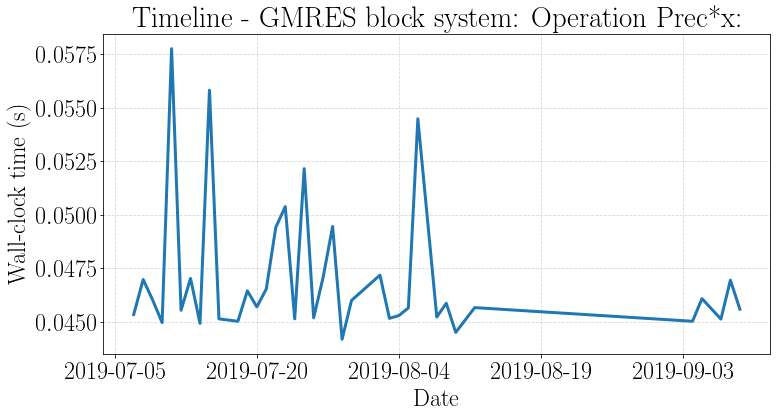

Dates:  (20190707, 20190708, 20190709, 20190710, 20190711, 20190712, 20190713, 20190714, 20190715, 20190716, 20190718, 20190719, 20190720, 20190721, 20190722, 20190723, 20190724, 20190725, 20190726, 20190727, 20190728, 20190729, 20190730, 20190802, 20190803, 20190804, 20190805, 20190806, 20190808, 20190809, 20190810, 20190812, 20190904, 20190905, 20190907, 20190908, 20190909)
Wall-clock Time:  (0.0453326, 0.0469663, 0.0460086, 0.0449563, 0.0577497, 0.045528400000000004, 0.0470177, 0.0449171, 0.0558124, 0.0451284, 0.0450152, 0.046437, 0.0456864, 0.0465275, 0.0494009, 0.0503724, 0.045129999999999997, 0.052146000000000005, 0.0451781, 0.047071299999999996, 0.049446000000000004, 0.0441753, 0.0459913, 0.0471711, 0.0451529, 0.0452835, 0.045640599999999996, 0.0544772, 0.0452151, 0.045856999999999995, 0.0444966, 0.0456545, 0.045016099999999996, 0.0460729, 0.0451192, 0.0469358, 0.0455811)


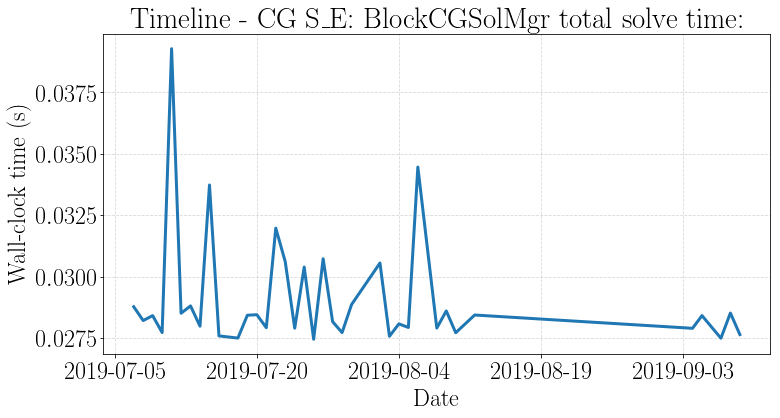

Dates:  (20190707, 20190708, 20190709, 20190710, 20190711, 20190712, 20190713, 20190714, 20190715, 20190716, 20190718, 20190719, 20190720, 20190721, 20190722, 20190723, 20190724, 20190725, 20190726, 20190727, 20190728, 20190729, 20190730, 20190802, 20190803, 20190804, 20190805, 20190806, 20190808, 20190809, 20190810, 20190812, 20190904, 20190905, 20190907, 20190908, 20190909)
Wall-clock Time:  (0.0287752, 0.0282125, 0.028413, 0.0277241, 0.0392834, 0.0285101, 0.0288093, 0.027982, 0.033733200000000005, 0.0275872, 0.027498699999999997, 0.028429100000000002, 0.0284501, 0.0279226, 0.031976199999999996, 0.0306084, 0.0279003, 0.0303925, 0.0274503, 0.0307313, 0.0281675, 0.027721299999999997, 0.028863100000000003, 0.0305558, 0.0275721, 0.028077400000000002, 0.0279312, 0.0344637, 0.027905600000000003, 0.028604, 0.0277167, 0.0284381, 0.027896900000000002, 0.0284138, 0.0274927, 0.0285192, 0.0276418)


In [4]:
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=24)
plt.rcParams['figure.figsize'] = (12, 6)

# Cases to plot:
case = 'R0'
np = 192
names = ('panzer::ModelEvaluator::evalModel(J):',
          'Stratimikos: BelosLOWS:',
          'GMRES block system: Operation Prec*x:',
          r'CG S\_E: BlockCGSolMgr total solve time:')
timers = ('panzer::ModelEvaluator::evalModel(J):',
          'Stratimikos: BelosLOWS:',
          'GMRES block system: Operation Prec*x:',
          'CG S_E: BlockCGSolMgr total solve time:')

# Plot:
for name, timer in zip(names, timers):
    dates, wtimes = json2timeline(files, case, np, timer, False)
    fdates = [dt.datetime.strptime(str(d),'%Y%m%d').date() for d in dates]

    # Plot
    plt.figure()
    plt.plot(fdates, wtimes, linewidth=3.0)
    plt.xlabel('Date')
    plt.ylabel('Wall-clock time (s)')
    #plt.ylim((6e-3, 1e-1))
    plt.tight_layout()
    plt.title('Timeline - ' + name)
    ax = plt.gca()
    ax.set_axisbelow(True)
    ax.grid(linestyle='--', alpha=0.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    #ax.tick_params(axis='x',rotation = 45)
    plt.show()

    # Print
    print("Dates: ", dates)
    print("Wall-clock Time: ", wtimes)